In [475]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=7, micro=0, releaselevel='final', serial=0)

In [476]:
get_ipython().magic(u'matplotlib inline')
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cvxopt as opt
from cvxopt import blas, solvers

In [477]:
inpath  = "/Users/haotianzhang/Desktop/"
outpath = "/Users/haotianzhang/Desktop/"
infile  = "ReturnsPortfolios.csv"
print(inpath+infile)
indata = pd.read_csv( inpath + infile)

/Users/haotianzhang/Desktop/ReturnsPortfolios.csv


In [478]:
indata.head(5)

,Date,MSCI WORLD,MSCI AC WORLD,MSCI EUROPE,MSCI EM,MSCI EAFE,MSCI PACIFIC,MSCI USA,Treasury.Bond.10Y,Treasury.Bill.90D,Treasury.Bill.30D
0,1/29/1988,0.024592,0.025330,-0.040626,0.098380,0.018081,0.049747,0.042834,0.044235,0.005001,0.002762
1,2/29/1988,0.058224,0.058079,0.059266,0.003396,0.066914,0.070676,0.041869,0.013917,0.005349,0.004564
2,3/31/1988,0.030382,0.031100,0.027948,0.107385,0.061675,0.078041,-0.033456,-0.019930,0.004803,0.004402
3,4/29/1988,0.012798,0.012980,0.019014,0.053382,0.014717,0.012751,0.009184,-0.012511,0.004554,0.004577
4,5/31/1988,-0.019802,-0.019521,-0.018278,0.029962,-0.031833,-0.038039,0.008603,-0.015848,0.005027,0.005051


In [479]:
RiskyAsset     = ["MSCI EUROPE","MSCI USA","MSCI PACIFIC","Treasury.Bond.10Y"]
RiskFreeAsset  = "Treasury.Bill.90D"

In [480]:
indata.loc[1:3,RiskyAsset]

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
1,0.059266,0.041869,0.070676,0.013917
2,0.027948,-0.033456,0.078041,-0.019930
3,0.019014,0.009184,0.012751,-0.012511


In [481]:
##PART 1
indata[RiskyAsset].mean()

MSCI EUROPE          0.007798
MSCI USA             0.009155
MSCI PACIFIC         0.003608
Treasury.Bond.10Y    0.005627
dtype: float64

In [482]:
indata[RiskyAsset].median()

MSCI EUROPE          0.010439
MSCI USA             0.012908
MSCI PACIFIC         0.001994
Treasury.Bond.10Y    0.005221
dtype: float64

In [483]:
indata[RiskyAsset].std()

MSCI EUROPE          0.049996
MSCI USA             0.041358
MSCI PACIFIC         0.055957
Treasury.Bond.10Y    0.019887
dtype: float64

In [484]:
indata[RiskyAsset].skew()

MSCI EUROPE         -0.487418
MSCI USA            -0.565864
MSCI PACIFIC         0.003849
Treasury.Bond.10Y   -0.009944
dtype: float64

In [485]:
indata[RiskyAsset].kurtosis()

MSCI EUROPE          1.274753
MSCI USA             1.218349
MSCI PACIFIC         0.874957
Treasury.Bond.10Y    0.839616
dtype: float64

In [486]:
indata[RiskyAsset].mean() / indata[RiskyAsset].std()

MSCI EUROPE          0.155978
MSCI USA             0.221373
MSCI PACIFIC         0.064470
Treasury.Bond.10Y    0.282970
dtype: float64

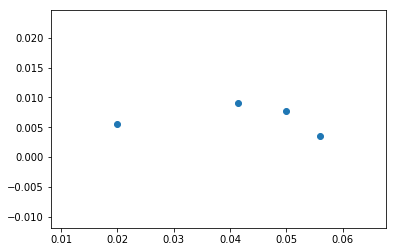

In [487]:
asset_return = indata[RiskyAsset].mean()
asset_risk = indata[RiskyAsset].std()
df = pd.DataFrame({"asset_risk":asset_risk, "asset_return":asset_return})
plt.scatter(df["asset_risk"], df["asset_return"])
plt.xlabel=('risk')
plt.ylabel=('return')
plt.show()

In [488]:
# 8. Write up a paragraph comparing the statistics of the risky assets
# MSCI USA has the highest mean of return, and MSCI Pacific has the lowest mean of return.
# MSCI USA has the highest mean of median, and MSCI Pacific has the lowest mean of median.
# MSCI Pacific has the highest standard deviation of return (most risky asset), and Treasury.Bond.10Y has the lowest standard deviation of return (least risky asset). 
# MSCI USA has the most negative value of skew, and MSCI USA has the least definite value of skew
# MSCI USA has the highest value of kurtosis , and Treasury.Bond.10Y has the lowest value of kurtosis.

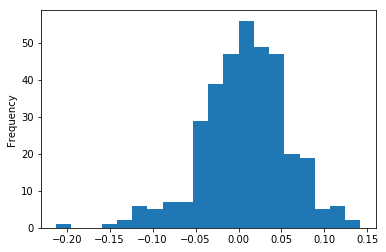

In [489]:
##PART 2
indata["MSCI EUROPE"].plot.hist(stacked=True, bins=20)

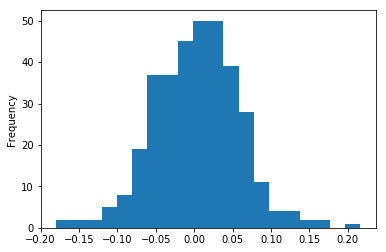

In [490]:
indata["MSCI PACIFIC"].plot.hist(stacked=True, bins=20)

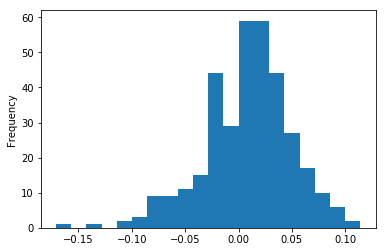

In [491]:
indata["MSCI USA"].plot.hist(stacked=True, bins=20)

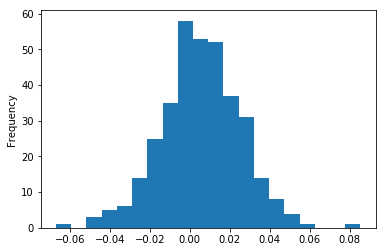

In [492]:
indata["Treasury.Bond.10Y"].plot.hist(stacked=True, bins=20)

In [ ]:
## All four graph seem to show normal distribution. 
## Treasury.Bond.10Y have a relatively more perfect normal distribution compared to the other 3.


In [493]:
##PART 3
pd.DataFrame.cov(indata.iloc[:,1:11])

,MSCI WORLD,MSCI AC WORLD,MSCI EUROPE,MSCI EM,MSCI EAFE,MSCI PACIFIC,MSCI USA,Treasury.Bond.10Y,Treasury.Bill.90D,Treasury.Bill.30D
MSCI WORLD,1.829491e-03,1.857011e-03,0.001959,0.002073,0.002007,0.001927,0.001579,-0.000072,-5.714910e-07,2.361634e-07
MSCI AC WORLD,1.857011e-03,1.893009e-03,0.001992,0.002212,0.002041,0.001965,0.001599,-0.000075,-5.995225e-07,2.879449e-07
MSCI EUROPE,1.958865e-03,1.992382e-03,0.002500,0.002251,0.002255,0.001813,0.001616,-0.000097,4.128561e-06,5.371443e-06
MSCI EM,2.073498e-03,2.211562e-03,0.002251,0.004424,0.002275,0.002247,0.001824,-0.000176,2.685331e-06,3.531978e-06
MSCI EAFE,2.006837e-03,2.041112e-03,0.002255,0.002275,0.002418,0.002435,0.001476,-0.000082,-2.681960e-06,-1.137128e-06
MSCI PACIFIC,1.927159e-03,1.965213e-03,0.001813,0.002247,0.002435,0.003131,0.001247,-0.000035,-8.921293e-06,-7.420575e-06
MSCI USA,1.578773e-03,1.599100e-03,0.001616,0.001824,0.001476,0.001247,0.001710,-0.000039,4.231289e-06,3.880084e-06
Treasury.Bond.10Y,-7.244054e-05,-7.542101e-05,-0.000097,-0.000176,-0.000082,-0.000035,-0.000039,0.000395,6.398223e-06,4.111967e-06
Treasury.Bill.90D,-5.714910e-07,-5.995225e-07,0.000004,0.000003,-0.000003,-0.000009,0.000004,0.000006,5.075423e-06,4.609024e-06
Treasury.Bill.30D,2.361634e-07,2.879449e-07,0.000005,0.000004,-0.000001,-0.000007,0.000004,0.000004,4.609024e-06,4.291624e-06


In [494]:
pd.DataFrame.corr(indata.iloc[:,1:11])

,MSCI WORLD,MSCI AC WORLD,MSCI EUROPE,MSCI EM,MSCI EAFE,MSCI PACIFIC,MSCI USA,Treasury.Bond.10Y,Treasury.Bill.90D,Treasury.Bill.30D
MSCI WORLD,1.000000,0.997868,0.916021,0.728829,0.954156,0.805188,0.892478,-0.085164,-0.005931,0.002665
MSCI AC WORLD,0.997868,1.000000,0.915931,0.764205,0.954032,0.807195,0.888674,-0.087168,-0.006116,0.003195
MSCI EUROPE,0.916021,0.915931,1.000000,0.676937,0.917064,0.647950,0.781742,-0.097888,0.036655,0.051862
MSCI EM,0.728829,0.764205,0.676937,1.000000,0.695570,0.603766,0.662956,-0.133087,0.017920,0.025633
MSCI EAFE,0.954156,0.954032,0.917064,0.695570,1.000000,0.884854,0.725762,-0.084321,-0.024210,-0.011163
MSCI PACIFIC,0.805188,0.807195,0.647950,0.603766,0.884854,1.000000,0.538701,-0.031418,-0.070768,-0.064014
MSCI USA,0.892478,0.888674,0.781742,0.662956,0.725762,0.538701,1.000000,-0.047390,0.045413,0.045287
Treasury.Bond.10Y,-0.085164,-0.087168,-0.097888,-0.133087,-0.084321,-0.031418,-0.047390,1.000000,0.142811,0.099811
Treasury.Bill.90D,-0.005931,-0.006116,0.036655,0.017920,-0.024210,-0.070768,0.045413,0.142811,1.000000,0.987557
Treasury.Bill.30D,0.002665,0.003195,0.051862,0.025633,-0.011163,-0.064014,0.045287,0.099811,0.987557,1.000000


In [495]:
cov = pd.DataFrame.cov(indata.iloc[:,1:11])
if np.linalg.det(cov) == 0:
    print("Singular")
else:
    print("Non-singular")

Non-singular


In [496]:
if np.allclose(cov.transpose(), cov)== True:
    print("Symmetric")
else:
    print("Not symmetric")

if np.all(np.linalg.eigvals(cov)) > 0:
    print("Positive definite")
else:
    print("Not Positive definite")

Symmetric
Positive definite


In [497]:
##PART 4
##MINIMUM VARIANCE PORTFOLIO
u = np.array([1,1,1,1,1,1,1,1,1,1])
m = np.array(indata.iloc[:,1:11].mean())
#Weight
w = (u @ np.linalg.inv(cov)) / (u @ np.linalg.inv(cov) @ np.transpose(u))
print(w)

[ 8.90246976e-02 -4.07958200e-02 -1.46243953e-02  1.51971492e-03
 -1.42317519e-02 -9.69571939e-04 -1.83144797e-02  1.23834017e-02
 -2.27836940e+00  3.26437761e+00]


In [498]:
#Returns
Return = m @ np.transpose(w)
print(Return)

0.00197575874868515


In [499]:
#Risk
Risk = np.sqrt(w @ cov @ np.transpose(w))
print(Risk)

0.0018568112263203334


In [500]:
##PORTFOLIO WITH EXPECTED RETURN OF 9% AND MINIMUM VARIANCE
#Weight
M = np.array([[m@np.linalg.inv(cov)@np.transpose(m), u@np.linalg.inv(cov)@np.transpose(m)],
              [m@np.linalg.inv(cov)@np.transpose(u), u@np.linalg.inv(cov)@np.transpose(u)]])
lambda1 = 2 * np.linalg.inv(M) @ [0.09,1]
w2 = (lambda1[0]*m@np.linalg.inv(cov) + lambda1[1]*u@np.linalg.inv(cov)) / 2 
print(w2)

[ 1.00290912e+01 -7.29253251e+00  1.34092337e+00  6.09285009e-01
 -3.16245172e+00  3.79868056e-01 -1.23251280e+00  1.54141128e-01
  3.03745751e+02 -3.03571563e+02]


In [501]:
#Verfiy Returns = 0.09
m @ np.transpose(w2)

0.09000000000000066

In [502]:
#Risk
np.sqrt(w2@cov@np.transpose(w2))

0.12363179590596747

     pcost       dcost       gap    pres   dres
 0: -3.3923e-01 -1.0850e+00  4e+02  2e+01  2e+01
 1: -1.0653e-02 -1.0769e+00  4e+00  2e-01  2e-01
 2: -8.3291e-03 -6.2923e-01  6e-01  2e-16  4e-15
 3: -1.0902e-02 -8.9200e-02  8e-02  2e-16  4e-15
 4: -7.3341e-02 -1.3400e-01  6e-02  7e-16  9e-16
 5: -7.7762e-02 -8.4053e-02  6e-03  4e-16  1e-15
 6: -8.2789e-02 -8.3773e-02  1e-03  4e-16  6e-16
 7: -8.3531e-02 -8.3541e-02  1e-05  1e-16  7e-16
 8: -8.3538e-02 -8.3538e-02  1e-07  1e-16  8e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.3704e-01 -1.0853e+00  4e+02  2e+01  2e+01
 1: -1.0707e-02 -1.0765e+00  4e+00  2e-01  2e-01
 2: -8.3403e-03 -6.2950e-01  6e-01  7e-16  4e-15
 3: -1.0911e-02 -8.9194e-02  8e-02  2e-16  4e-15
 4: -7.3297e-02 -1.3397e-01  6e-02  7e-16  9e-16
 5: -7.7714e-02 -8.3993e-02  6e-03  8e-16  1e-15
 6: -8.2733e-02 -8.3710e-02  1e-03  7e-16  6e-16
 7: -8.3468e-02 -8.3478e-02  1e-05  6e-16  9e-16
 8: -8.3476e-02 -8.3476e-02  1e-07  1e-16  8e-1

 6: -7.5510e-02 -7.6807e-02  1e-03  4e-16  6e-16
 7: -7.6630e-02 -7.6643e-02  1e-05  2e-16  7e-16
 8: -7.6641e-02 -7.6641e-02  1e-07  7e-16  7e-16
 9: -7.6641e-02 -7.6641e-02  1e-09  4e-16  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7103e-01 -1.0946e+00  4e+02  2e+01  2e+01
 1: -4.2107e-02 -1.0521e+00  8e+00  4e-01  4e-01
 2: -1.1746e-02 -8.0908e-01  8e-01  4e-16  3e-15
 3: -1.3619e-02 -8.9162e-02  8e-02  3e-16  4e-15
 4: -5.8531e-02 -1.1351e-01  5e-02  2e-16  8e-16
 5: -6.7903e-02 -7.6205e-02  8e-03  7e-16  9e-16
 6: -7.2575e-02 -7.5914e-02  3e-03  2e-16  5e-16
 7: -7.5300e-02 -7.5341e-02  4e-05  9e-16  6e-16
 8: -7.5332e-02 -7.5333e-02  4e-07  4e-16  7e-16
 9: -7.5333e-02 -7.5333e-02  4e-09  6e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5142e-01 -1.0921e+00  4e+02  2e+01  2e+01
 1: -4.5949e-02 -1.0497e+00  9e+00  4e-01  4e-01
 2: -1.1956e-02 -8.2305e-01  8e-01  9e-16  4e-15
 3: -1.3769e-02 -8.8775

 3: -1.0618e-02 -6.8712e-02  6e-02  2e-16  4e-15
 4: -1.8727e-02 -5.4554e-02  4e-02  3e-17  4e-16
 5: -2.0488e-02 -3.5612e-02  2e-02  2e-16  3e-16
 6: -2.2990e-02 -3.2609e-02  1e-02  4e-16  2e-16
 7: -2.4996e-02 -2.8071e-02  3e-03  2e-16  2e-16
 8: -2.5668e-02 -2.8147e-02  2e-03  2e-16  2e-16
 9: -2.6623e-02 -2.7842e-02  1e-03  2e-16  2e-16
10: -2.7300e-02 -2.7591e-02  3e-04  7e-16  2e-16
11: -2.7520e-02 -2.7531e-02  1e-05  2e-16  2e-16
12: -2.7529e-02 -2.7529e-02  1e-07  4e-16  3e-16
13: -2.7529e-02 -2.7529e-02  1e-09  2e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0218e-02 -1.0274e+00  4e+02  2e+01  2e+01
 1: -1.4690e-02 -1.0187e+00  6e+00  3e-01  3e-01
 2: -9.0014e-03 -7.1017e-01  7e-01  4e-16  4e-15
 3: -1.0001e-02 -6.5354e-02  6e-02  4e-16  4e-15
 4: -1.6232e-02 -4.7803e-02  3e-02  2e-17  4e-16
 5: -1.7836e-02 -3.0858e-02  1e-02  4e-16  3e-16
 6: -2.0337e-02 -2.6708e-02  6e-03  2e-16  2e-16
 7: -2.1964e-02 -2.4105e-02  2e-03  7e-16  2e-

 4: -4.3284e-03 -1.2335e-02  8e-03  4e-16  4e-16
 5: -5.3963e-03 -9.4902e-03  4e-03  1e-17  4e-16
 6: -6.7023e-03 -9.7472e-03  3e-03  2e-16  1e-15
 7: -7.8612e-03 -8.8934e-03  1e-03  4e-16  2e-15
 8: -8.1677e-03 -8.6542e-03  5e-04  4e-16  9e-16
 9: -8.3466e-03 -8.5627e-03  2e-04  1e-15  1e-15
10: -8.5150e-03 -8.5447e-03  3e-05  9e-16  1e-15
11: -8.5402e-03 -8.5427e-03  2e-06  2e-16  1e-15
12: -8.5424e-03 -8.5425e-03  6e-08  4e-16  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.3214e-03 -1.0115e+00  4e+02  2e+01  2e+01
 1: -3.7897e-03 -1.0057e+00  4e+00  2e-01  2e-01
 2: -3.1692e-03 -5.6667e-01  6e-01  3e-16  3e-15
 3: -3.6546e-03 -5.4164e-02  5e-02  1e-17  4e-15
 4: -4.0292e-03 -1.0613e-02  7e-03  4e-16  4e-16
 5: -5.4171e-03 -9.9702e-03  5e-03  4e-16  8e-16
 6: -6.7779e-03 -8.9853e-03  2e-03  2e-16  1e-15
 7: -7.5908e-03 -8.5515e-03  1e-03  2e-16  1e-15
 8: -7.7665e-03 -8.3434e-03  6e-04  2e-16  1e-15
 9: -8.0752e-03 -8.2463e-03  2e-04  7e-17  1e-

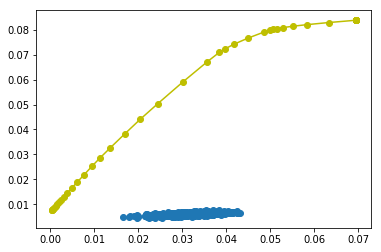

In [503]:
##EFFICIENT PORTFOLIO

def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 50
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(indata.iloc[:,1:11])

plt.plot(stds, means, 'o')

plt.plot(risks, returns, 'y-o')

print(weights)

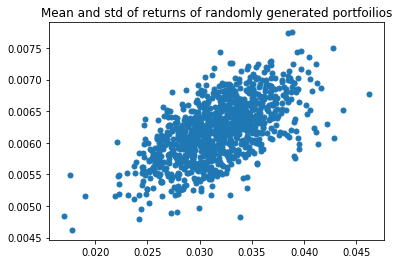

In [504]:
##PLOT PORTFOLIOS AND ASSET CLASSES
def rand_weights(n):
    k = np.random.rand(n)
    return k / sum(k)

def random_portfolio(m,cov):
    w = np.asmatrix(rand_weights(10))
    mu = w @ m.T
    sigma = np.sqrt(w@cov@w.T)
    
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

n_portfolios = 1000
means, stds = np.column_stack([random_portfolio(m,cov)
                              for _ in range(n_portfolios)])

plot1 = plt.plot(stds, means, 'o', markersize=5)
plot1 = plt.title('Mean and std of returns of randomly generated portfoilios')

0.0061810104683908025
0.03138326397494984


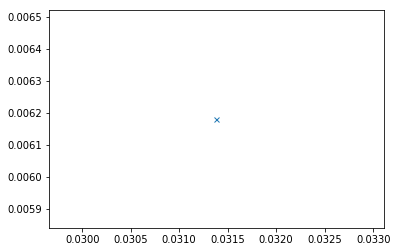

In [505]:
# 5. Plot an equal weighted portolio on the graph
w5 = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,]
#Returns
Return = m @ np.transpose(w5)
print(Return)
#Risk
Risk = np.sqrt(w5 @ cov @ np.transpose(w5))
print(Risk)
plt.plot(Risk, Return, 'x', markersize=5)
plt.xlabel = ("qweqwe")
plt.ylabel = ("qweqwe")

In [506]:
# 6. What is the expected return and risk of the minimum variance portfolio
#Returns
Return = m @ np.transpose(w)
print(Return)
#Risk
Risk = np.sqrt(w @ cov @ np.transpose(w))
print(Risk)

0.00197575874868515
0.0018568112263203334


In [507]:
#PART 5
#MARKET PORTFOLIO 1: MSCI AC WORLD
for i in indata[RiskyAsset]:
    print ("Beta of",i,"to Market portfoilio 1 'MSCI AC World' is: ",
           np.cov(indata[i],indata["MSCI AC WORLD"])[0][1] / indata["MSCI AC WORLD"].var())

Beta of MSCI EUROPE to Market portfoilio 1 'MSCI AC World' is:  1.0524949617626276
Beta of MSCI USA to Market portfoilio 1 'MSCI AC World' is:  0.8447400904827618
Beta of MSCI PACIFIC to Market portfoilio 1 'MSCI AC World' is:  1.038142911055971
Beta of Treasury.Bond.10Y to Market portfoilio 1 'MSCI AC World' is:  -0.039841871626824045


In [508]:
#MARKET PORTFOLIO 1: MSCI USA
for i in indata[RiskyAsset]:
    print ("Beta of",i,"to Market portfoilio 1 'MSCI USA' is: ",
           np.cov(indata[i],indata["MSCI USA"])[0][1] / indata["MSCI USA"].var())

Beta of MSCI EUROPE to Market portfoilio 1 'MSCI USA' is:  0.9450188010082923
Beta of MSCI USA to Market portfoilio 1 'MSCI USA' is:  1.0000000000000002
Beta of MSCI PACIFIC to Market portfoilio 1 'MSCI USA' is:  0.728863027669554
Beta of Treasury.Bond.10Y to Market portfoilio 1 'MSCI USA' is:  -0.022787414124747322


In [509]:
###Compare the betas for each asset class

##For the MARKET PORTFOLIO 1 MSCI AC WORLD:
#MSCI EUROPE moves in the same direction but in a greater amount than the market portfolio
#MSCI USA moves in the same direction as the market portfolio, but in a lesser amount than the benchmark
#MSCI PACIFIC moves in the same direction but in a greater amount than the market portfolio
#Treasury.Bond.10Y moves slightly in the opposite direction as the market portfolio 

##For the MARKET PORTFOLIO 2 MSCI USA:
#MSCI EUROPE moves in the same direction but in a lesser amount than the market portfolio
#MSCI USA is the market portfolio 
#MSCI PACIFIC moves in the same direction but in a lesser amount than the market portfolio
#Treasury.Bond.10Y moves slightly in the opposite direction as the market portfolio

In [511]:
## EXTRA CREDIT
df = indata.iloc[:,1:11]
df.ewm(span=384).cov()

MSCI WORLD  MSCI AC WORLD   MSCI EUROPE  \
0   MSCI WORLD                  NaN            NaN           NaN   
    MSCI AC WORLD               NaN            NaN           NaN   
    MSCI EUROPE                 NaN            NaN           NaN   
    MSCI EM                     NaN            NaN           NaN   
    MSCI EAFE                   NaN            NaN           NaN   
    MSCI PACIFIC                NaN            NaN           NaN   
    MSCI USA                    NaN            NaN           NaN   
    Treasury.Bond.10Y           NaN            NaN           NaN   
    Treasury.Bill.90D           NaN            NaN           NaN   
    Treasury.Bill.30D           NaN            NaN           NaN   
1   MSCI WORLD         5.655344e-04   5.506945e-04  1.679750e-03   
    MSCI AC WORLD      5.506945e-04   5.362440e-04  1.635673e-03   
    MSCI EUROPE        1.679750e-03   1.635673e-03  4.989195e-03   
    MSCI EM           -1.597222e-03  -1.555310e-03 -4.744070e-03   
    MSCI EAFE          8.211561e-04   7.996086e-04  2.438998e-03   
    MSCI PACIFIC       3.519366e-04   3.427016e-04  1.045322e-03   
    MSCI USA          -1.622308e-05  -1.579738e-05 -4.818580e-05   
    Treasury.Bond.10Y -5.098179e-04  -4.964400e-04 -1.514261e-03   
    Treasury.Bill.90D  5.851858e-06   5.698302e-06  1.738119e-05   
    Treasury.Bill.30D  3.030186e-05   2.950672e-05  9.000259e-05   
2   MSCI WORLD         3.335116e-04   3.233344e-04  4.377981e-04   
    MSCI AC WORLD      3.233344e-04   3.134702e-04  4.253695e-04   
    MSCI EUROPE        4.377981e-04   4.253695e-04  9.356611e-04   
    MSCI EM           -1.214752e-03  -1.177224e-03 -1.416446e-03   
    MSCI EAFE          1.056545e-04   1.030680e-04  3.859135e-04   
    MSCI PACIFIC      -5.811949e-05  -5.589855e-05  9.718223e-05   
    MSCI USA           8.094971e-04   7.834156e-04  5.277869e-04   
    Treasury.Bond.10Y  3.335788e-04   3.223314e-04  2.374412e-05   
    Treasury.Bill.90D  6.225994e-06   6.031333e-06  6.360799e-06   
    Treasury.Bill.30D  3.561899e-06   3.477302e-06  1.401851e-05   
...                             ...            ...           ...   
345 MSCI WORLD         3.344160e-04   3.180905e-04  5.272619e-04   
    MSCI AC WORLD      3.180905e-04   3.028584e-04  5.006024e-04   
    MSCI EUROPE        5.272619e-04   5.006024e-04  8.467713e-04   
    MSCI EM            1.879656e-04   1.816582e-04  2.877737e-04   
    MSCI EAFE          4.240933e-04   4.021868e-04  6.742545e-04   
    MSCI PACIFIC       2.449337e-04   2.312169e-04  3.749386e-04   
    MSCI USA           2.837471e-04   2.706718e-04  4.437531e-04   
    Treasury.Bond.10Y  1.678433e-04   1.592477e-04  2.664669e-04   
    Treasury.Bill.90D  2.621228e-06   2.447686e-06  4.375565e-06   
    Treasury.Bill.30D  4.827871e-07   4.510981e-07  8.032607e-07   
346 MSCI WORLD         4.698483e-04   3.422016e-04  1.425737e-04   
    MSCI AC WORLD      3.422016e-04   2.531660e-04  1.257837e-04   
    MSCI EUROPE        1.425737e-04   1.257837e-04  1.727739e-04   
    MSCI EM           -6.748763e-04  -4.562228e-04 -8.078239e-06   
    MSCI EAFE          3.633377e-06   2.431122e-05  1.273721e-04   
    MSCI PACIFIC      -2.462374e-04  -1.578551e-04  4.779155e-05   
    MSCI USA           7.632868e-04   5.425878e-04  1.538371e-04   
    Treasury.Bond.10Y -3.564307e-04  -2.377703e-04  1.736648e-05   
    Treasury.Bill.90D -2.304797e-06  -1.466276e-06  6.145005e-07   
    Treasury.Bill.30D -4.609938e-07  -2.952346e-07  1.092903e-07   
347 MSCI WORLD         2.043199e-04   1.988238e-04  5.717308e-04   
    MSCI AC WORLD      1.988238e-04   2.046868e-04  6.669897e-04   
    MSCI EUROPE        5.717308e-04   6.669897e-04  2.708621e-03   
    MSCI EM            1.461258e-04   2.408884e-04  1.382148e-03   
    MSCI EAFE          3.865503e-04   4.607293e-04  1.924752e-03   
    MSCI PACIFIC       7.414327e-05   1.142204e-04  6.169685e-04   
    MSCI USA           9.956299e-05   4.578429e-05 -2.305979e-04   
    Treasury.